In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [28]:
import matplotlib.style as style
style.available
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [29]:
path = "MicrodadosParaDecisionTree.csv"

dadosEnem = pd.read_csv(path,sep=';',encoding='latin1',low_memory=False)

## Separador dos dados em conjunto de teste/treino

In [30]:
np.random.seed(43267)

df = dadosEnem[['NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','NU_NOTA_CN']]

df = df[(df != 0).all(1)]

var_adivinhar = 'NU_NOTA_MT';
y_adivinhar = dadosEnem['NU_NOTA_MT']


#Removendo as variaveis de notas da dataFrame
x_variaveis = dadosEnem
x_variaveis =  x_variaveis.loc[:, dadosEnem.columns != 'NU_NOTA_CN']
x_variaveis =  x_variaveis.loc[:, x_variaveis.columns != 'NU_NOTA_LC']
x_variaveis =  x_variaveis.loc[:, x_variaveis.columns != 'NU_NOTA_MT']
x_variaveis =  x_variaveis.loc[:, x_variaveis.columns != 'NU_NOTA_REDACAO']
x_variaveis =  x_variaveis.loc[:, x_variaveis.columns != 'NU_NOTA_CH']


#x_variaveis = df[['NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_REDACAO','NU_NOTA_CN']]


#y_adivinhar

# f(x) = y
x_treino, x_teste, y_treino, y_teste = train_test_split(x_variaveis, y_adivinhar)






## Prevendo notas de matemática

### Algoritmo de Previsão Burro

In [31]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, dummy_predicoes)

12288.032451893112

### Algoritmo Decision Tree Regressor

In [32]:
modelo = DecisionTreeRegressor(max_depth=8)
modelo.fit(x_treino, y_treino)
predicoes_notas_lc = modelo.predict(x_teste)

print(mean_squared_error(y_teste, predicoes_notas_lc))



7776.32844259161


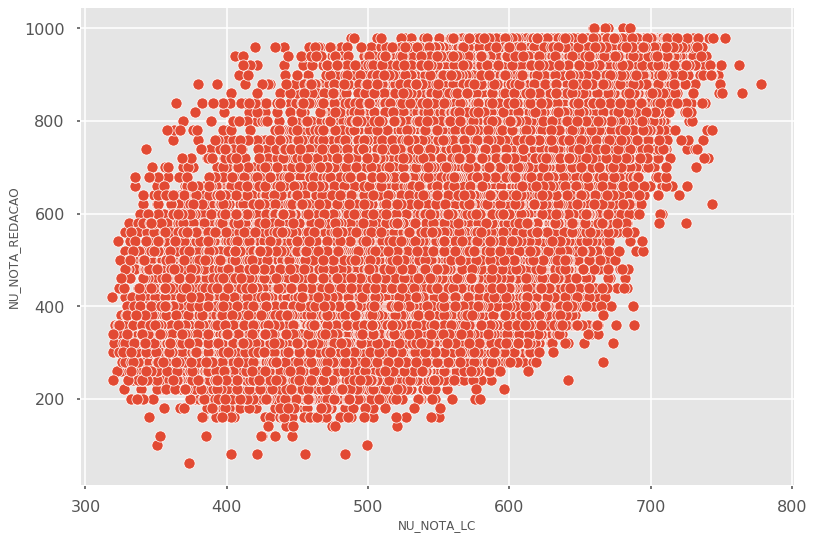

In [33]:
#sns.scatterplot(x=x_teste['NU_NOTA_REDACAO'].values, y=predicoes_notas_lc)
#sns.scatterplot(x=x_teste['NU_NOTA_REDACAO'].values, y=y_teste.values)

df = dadosEnem[['NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','NU_NOTA_CN']]

df = df[(df != 0).all(1)]

sns.scatterplot(x="NU_NOTA_LC", y="NU_NOTA_REDACAO",data=df)


## Usando algoritmo de mineração de regras de associação

In [34]:
##Depois fazer tratamento diferente
path = "MicrodadosParaDecisionTree.csv"

dadosEnem = pd.read_csv(path,sep=';',encoding='latin1',low_memory=False)

In [35]:
df = dadosEnem
df = dadosEnem.drop(['QuartoPessoas'], axis=1)
df = dadosEnem.drop(['MediaEstudoPais'], axis=1) 
df = dadosEnem.drop(['NU_IDADE'], axis=1)


x_variaveis = df
x_variaveis =  x_variaveis.loc[:, df.columns != 'NU_NOTA_CN']
x_variaveis =  x_variaveis.loc[:, x_variaveis.columns != 'NU_NOTA_LC']
x_variaveis =  x_variaveis.loc[:, x_variaveis.columns != 'NU_NOTA_MT']
x_variaveis =  x_variaveis.loc[:, x_variaveis.columns != 'NU_NOTA_REDACAO']
x_variaveis =  x_variaveis.loc[:, x_variaveis.columns != 'NU_NOTA_CH']






In [36]:
from sklearn.preprocessing import LabelBinarizer

#y = LabelBinarizer().fit_transform(x_variaveis.TP_COR_RACA)

raca = pd.get_dummies(x_variaveis.TP_COR_RACA, prefix='RACA')

sexo = pd.get_dummies(x_variaveis.TP_SEXO, prefix='SEXO')
dependencia_esc = pd.get_dummies(x_variaveis.TP_DEPENDENCIA_ADM_ESC, prefix='dependencia_esc')
localizacao_esc = pd.get_dummies(x_variaveis.TP_LOCALIZACAO_ESC, prefix='localizacao_esc')
lingua = pd.get_dummies(x_variaveis.TP_LINGUA, prefix='lingua')
q003 = pd.get_dummies(x_variaveis.Q003, prefix='q003')
q004 = pd.get_dummies(x_variaveis.Q004, prefix='q004')
q006 = pd.get_dummies(x_variaveis.Q006, prefix='q006')
q022 = pd.get_dummies(x_variaveis.Q022, prefix='q022')
q024 = pd.get_dummies(x_variaveis.Q024, prefix='q024')
q025 = pd.get_dummies(x_variaveis.Q025, prefix='q025')

dataEncoded = pd.pandas.concat([raca, sexo,dependencia_esc,localizacao_esc,lingua,q003,q004,q006,q022,q024,q025,dadosEnem['QuartoPessoas'],dadosEnem['MediaEstudoPais'],dadosEnem['NU_IDADE']],axis=1)




In [37]:
# Substituindo de acordo com os valores no dicionário
raca.RACA_0.replace(1,"Não_Declarado",inplace=True)
raca.RACA_1.replace(1,"Branca",inplace=True)
raca.RACA_2.replace(1,"Preta",inplace=True)
raca.RACA_3.replace(1,"Parda",inplace=True)
raca.RACA_4.replace(1,"Amarela",inplace=True)
raca.RACA_5.replace(1,"Indígena",inplace=True)



In [38]:
sexo['SEXO_0'].replace(1,"Masculino",inplace=True)
sexo['SEXO_1'].replace(1,"Feminino",inplace=True)

In [39]:
dependencia_esc['dependencia_esc_1.0'].replace(1,"Federal",inplace=True)
dependencia_esc['dependencia_esc_2.0'].replace(1,"Estadual",inplace=True)
dependencia_esc['dependencia_esc_3.0'].replace(1,"Municipal",inplace=True)
dependencia_esc['dependencia_esc_4.0'].replace(1,"Privada",inplace=True)

In [40]:
localizacao_esc['localizacao_esc_1.0'].replace(1,"Urbana",inplace=True)
localizacao_esc['localizacao_esc_2.0'].replace(1,"Rural",inplace=True)


In [41]:
lingua['lingua_0'].replace(1,"Ingles",inplace=True)
lingua['lingua_1'].replace(1,"Espanhol",inplace=True)

In [42]:
q003['q003_0'].replace(1,"Profissao_Pai_Grupo_1",inplace=True)
q003['q003_1'].replace(1,"Profissao_Pai_Grupo_2",inplace=True)
q003['q003_2'].replace(1,"Profissao_Pai_Grupo_3",inplace=True)

In [43]:
q004['q004_0'].replace(1,"Profissao_Mae_Grupo_1",inplace=True)
q004['q004_1'].replace(1,"Profissao_Mae_Grupo_2",inplace=True)
q004['q004_2'].replace(1,"Profissao_Mae_Grupo_3",inplace=True)

In [44]:
q006['q006_1'].replace(1,"Grupo_Renda_1",inplace=True)
q006['q006_2'].replace(1,"Grupo_Renda_2",inplace=True)
q006['q006_3'].replace(1,"Grupo_Renda_2",inplace=True)

In [45]:
q022['q022_0'].replace(1,"Nao_Tem_Celular_Casa",inplace=True)
q022['q022_1'].replace(1,"Tem_Celular_Casa",inplace=True)

In [46]:
q024['q024_0'].replace(1,"Nao_Tem_Computador_Casa",inplace=True)
q024['q024_1'].replace(1,"Tem_Computador_Casa",inplace=True)

In [47]:
q025['q025_0'].replace(1,"Nao_Tem_Internet_Casa",inplace=True)
q025['q025_1'].replace(1,"Tem_Internet_Casa",inplace=True)

In [48]:
#para rodas os algoritmos vai ser necessario passar pelas colunas para criar a tabela de itens

encoded_values = pd.pandas.concat([raca, sexo,dependencia_esc,localizacao_esc,lingua,q003,q004,q006,q022,q024,q025], axis=1)

encoded_values


RACA_0  RACA_1 RACA_2 RACA_3   RACA_4 RACA_5     SEXO_0    SEXO_1  \
0           0       0      0  Parda        0      0          0  Feminino   
1           0       0      0  Parda        0      0          0  Feminino   
2           0  Branca      0      0        0      0          0  Feminino   
3           0  Branca      0      0        0      0          0  Feminino   
4           0  Branca      0      0        0      0  Masculino         0   
...       ...     ...    ...    ...      ...    ...        ...       ...   
107620      0  Branca      0      0        0      0  Masculino         0   
107621      0       0      0  Parda        0      0          0  Feminino   
107622      0       0  Preta      0        0      0  Masculino         0   
107623      0  Branca      0      0        0      0          0  Feminino   
107624      0       0      0      0  Amarela      0  Masculino         0   

       dependencia_esc_1.0 dependencia_esc_2.0  ...                 q004_2  \
0                        0            Estadual  ...  Profissao_Mae_Grupo_3   
1                        0            Estadual  ...                      0   
2                        0            Estadual  ...  Profissao_Mae_Grupo_3   
3                        0            Estadual  ...                      0   
4                        0                   0  ...                      0   
...                    ...                 ...  ...                    ...   
107620                   0            Estadual  ...                      0   
107621                   0            Estadual  ...                      0   
107622                   0            Estadual  ...  Profissao_Mae_Grupo_3   
107623                   0            Estadual  ...                      0   
107624                   0            Estadual  ...                      0   

               q006_1         q006_2 q006_3 q022_0            q022_1  \
0       Grupo_Renda_1              0      0      0  Tem_Celular_Casa   
1       Grupo_Renda_1              0      0      0  Tem_Celular_Casa   
2                   0  Grupo_Renda_2      0      0  Tem_Celular_Casa   
3       Grupo_Renda_1              0      0      0  Tem_Celular_Casa   
4       Grupo_Renda_1              0      0      0  Tem_Celular_Casa   
...               ...            ...    ...    ...               ...   
107620              0  Grupo_Renda_2      0      0  Tem_Celular_Casa   
107621  Grupo_Renda_1              0      0      0  Tem_Celular_Casa   
107622  Grupo_Renda_1              0      0      0  Tem_Celular_Casa   
107623  Grupo_Renda_1              0      0      0  Tem_Celular_Casa   
107624  Grupo_Renda_1              0      0      0  Tem_Celular_Casa   

                         q024_0               q024_1                 q025_0  \
0       Nao_Tem_Computador_Casa                    0                      0   
1       Nao_Tem_Computador_Casa                    0                      0   
2                             0  Tem_Computador_Casa                      0   
3       Nao_Tem_Computador_Casa                    0  Nao_Tem_Internet_Casa   
4       Nao_Tem_Computador_Casa                    0                      0   
...                         ...                  ...                    ...   
107620                        0  Tem_Computador_Casa                      0   
107621  Nao_Tem_Computador_Casa                    0  Nao_Tem_Internet_Casa   
107622  Nao_Tem_Computador_Casa                    0  Nao_Tem_Internet_Casa   
107623  Nao_Tem_Computador_Casa                    0                      0   
107624  Nao_Tem_Computador_Casa                    0  Nao_Tem_Internet_Casa   

                   q025_1  
0       Tem_Internet_Casa  
1       Tem_Internet_Casa  
2       Tem_Internet_Casa  
3                       0  
4       Tem_Internet_Casa  
...                   ...  
107620  Tem_Internet_Casa  
107621                  0  
107622                  0  
107623  Tem_Internet_Casa  
107624                  0  

[10762

In [49]:
encoded_values.to_csv("dadosEnemParaAssociacao.csv",sep=";")


In [50]:
records = []
for i in range(0,100):
    records.append([str(encoded_values.values[i,j]) for j in range(0, encoded_values.shape[1] )])

In [51]:
def remove_values_from_list(the_list, val):
   return [value for value in the_list if value != val]



In [52]:
newRecords = []
for record in records:
    record = remove_values_from_list(record,"0")
    newRecords.append(record)

In [54]:
dadosParaMineracao = pd.DataFrame(newRecords);
dadosParaMineracao.to_csv("dadosEnemParaAssociacao.csv",sep=";")

In [55]:
!pip install apyori
from apyori import apriori

In [56]:
association_rules = apriori(newRecords, min_support=0.0045, min_confidence=0.4, min_lift=3, min_length=2)


In [57]:
association_results = list(association_rules)
association_results[0]


RelationRecord(items=frozenset({'Nao_Tem_Computador_Casa', 'Amarela'}), support=0.01, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Amarela'}), items_add=frozenset({'Nao_Tem_Computador_Casa'}), confidence=1.0, lift=3.3333333333333335)])

In [58]:
len(association_results)

31845

In [59]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Nao_Tem_Computador_Casa -> Amarela
Support: 0.01
Confidence: 1.0
Lift: 3.3333333333333335
Rule: Privada -> Grupo_Renda_2
Support: 0.04
Confidence: 0.7999999999999999
Lift: 3.333333333333333
Rule: Nao_Tem_Celular_Casa -> Nao_Tem_Computador_Casa
Support: 0.03
Confidence: 1.0
Lift: 3.3333333333333335
Rule: Nao_Tem_Celular_Casa -> Nao_Tem_Internet_Casa
Support: 0.02
Confidence: 0.6666666666666667
Lift: 3.3333333333333335
Rule: Nao_Tem_Computador_Casa -> Rural
Support: 0.02
Confidence: 1.0
Lift: 3.3333333333333335
Rule: Profissao_Mae_Grupo_3 -> Privada
Support: 0.04
Confidence: 0.7999999999999999
Lift: 3.478260869565217
Rule: Profissao_Pai_Grupo_3 -> Privada
Support: 0.04
Confidence: 0.7999999999999999
Lift: 5.333333333333333
Rule: Privada -> Rural
Support: 0.01
Confidence: 0.5
Lift: 10.0
Rule: Profissao_Pai_Grupo_3 -> Profissao_Mae_Grupo_3
Support: 0.11
Confidence: 0.47826086956521735
Lift: 3.1884057971014492
Rule: Estadual -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lif

Rule: Estadual -> Masculino
Support: 0.02
Confidence: 1.0
Lift: 3.846153846153846
Rule: Estadual -> Masculino
Support: 0.04
Confidence: 0.7999999999999999
Lift: 5.7142857142857135
Rule: Estadual -> Masculino
Support: 0.01
Confidence: 1.0
Lift: 3.4482758620689657
Rule: Estadual -> Masculino
Support: 0.02
Confidence: 1.0
Lift: 7.142857142857142
Rule: Estadual -> Masculino
Support: 0.01
Confidence: 1.0
Lift: 3.4482758620689657
Rule: Estadual -> Masculino
Support: 0.02
Confidence: 0.5
Lift: 3.846153846153846
Rule: Estadual -> Nao_Tem_Internet_Casa
Support: 0.02
Confidence: 0.6666666666666667
Lift: 5.128205128205129
Rule: Estadual -> Parda
Support: 0.03
Confidence: 1.0
Lift: 9.090909090909092
Rule: Estadual -> Nao_Tem_Celular_Casa
Support: 0.01
Confidence: 1.0
Lift: 3.846153846153846
Rule: Estadual -> Nao_Tem_Celular_Casa
Support: 0.02
Confidence: 0.6666666666666667
Lift: 3.0303030303030307
Rule: Estadual -> Profissao_Pai_Grupo_1
Support: 0.01
Confidence: 1.0
Lift: 3.846153846153846
Rule: E

Confidence: 1.0
Lift: 7.692307692307692
Rule: Nao_Tem_Celular_Casa -> Masculino
Support: 0.01
Confidence: 1.0
Lift: 4.0
Rule: Nao_Tem_Celular_Casa -> Masculino
Support: 0.01
Confidence: 1.0
Lift: 4.166666666666667
Rule: Nao_Tem_Celular_Casa -> Masculino
Support: 0.01
Confidence: 1.0
Lift: 3.571428571428571
Rule: Nao_Tem_Celular_Casa -> Masculino
Support: 0.01
Confidence: 1.0
Lift: 14.285714285714285
Rule: Nao_Tem_Celular_Casa -> Masculino
Support: 0.01
Confidence: 1.0
Lift: 5.2631578947368425
Rule: Nao_Tem_Celular_Casa -> Masculino
Support: 0.01
Confidence: 1.0
Lift: 5.88235294117647
Rule: Nao_Tem_Celular_Casa -> Masculino
Support: 0.01
Confidence: 1.0
Lift: 5.0
Rule: Nao_Tem_Celular_Casa -> Masculino
Support: 0.01
Confidence: 1.0
Lift: 3.2258064516129035
Rule: Nao_Tem_Celular_Casa -> Masculino
Support: 0.01
Confidence: 1.0
Lift: 3.0303030303030303
Rule: Masculino -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 3.3333333333333335
Rule: Masculino -> Nao_Tem_Computador_Cas

Confidence: 1.0
Lift: 4.166666666666667
Rule: Federal -> Branca
Support: 0.03
Confidence: 0.75
Lift: 5.769230769230769
Rule: Federal -> Tem_Computador_Casa
Support: 0.03
Confidence: 0.75
Lift: 6.25
Rule: Federal -> Branca
Support: 0.03
Confidence: 0.75
Lift: 5.769230769230769
Rule: Federal -> Branca
Support: 0.03
Confidence: 0.75
Lift: 5.769230769230769
Rule: Federal -> Branca
Support: 0.01
Confidence: 1.0
Lift: 4.166666666666667
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 4.545454545454546
Rule: Federal -> Branca
Support: 0.01
Confidence: 1.0
Lift: 4.3478260869565215
Rule: Federal -> Branca
Support: 0.01
Confidence: 1.0
Lift: 4.166666666666667
Rule: Federal -> Tem_Computador_Casa
Support: 0.04
Confidence: 1.0
Lift: 4.545454545454546
Rule: Federal -> Branca
Support: 0.04
Confidence: 1.0
Lift: 4.3478260869565215
Rule: Federal -> Branca
Support: 0.04
Confidence: 1.0
Lift: 4.166666666666667
Rule: Federal -> Tem_Computador_Casa
Support: 0.04
Confidence: 1.0
Lif

Support: 0.01
Confidence: 0.5
Lift: 3.571428571428571
Rule: Federal -> Profissao_Pai_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 3.571428571428571
Rule: Federal -> Profissao_Pai_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 3.3333333333333335
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 3.846153846153846
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 3.571428571428571
Rule: Federal -> Profissao_Pai_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 3.571428571428571
Rule: Feminino -> Parda
Support: 0.01
Confidence: 1.0
Lift: 4.166666666666667
Rule: Nao_Tem_Celular_Casa -> Feminino
Support: 0.01
Confidence: 0.5
Lift: 3.571428571428571
Rule: Nao_Tem_Celular_Casa -> Feminino
Support: 0.01
Confidence: 0.5
Lift: 3.571428571428571
Rule: Nao_Tem_Celular_Casa -> Feminino
Support: 0.01
Confidence: 0.5
Lift: 4.545454545454546
Rule: Nao_Tem_Celular_Casa -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 3.3333333333333335
Rule: Nao_Tem_Celular_Casa -> Fem

Support: 0.01
Confidence: 1.0
Lift: 4.3478260869565215
Rule: Estadual -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 4.0
Rule: Estadual -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 3.846153846153846
Rule: Estadual -> Preta
Support: 0.01
Confidence: 1.0
Lift: 8.333333333333334
Rule: Profissao_Pai_Grupo_1 -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 4.166666666666667
Rule: Estadual -> Profissao_Pai_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 5.2631578947368425
Rule: Profissao_Pai_Grupo_1 -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 7.142857142857142
Rule: Profissao_Mae_Grupo_3 -> Profissao_Pai_Grupo_1
Support: 0.01
Confidence: 1.0
Lift: 3.0303030303030303
Rule: Estadual -> Preta
Support: 0.02
Confidence: 0.5
Lift: 3.3333333333333335
Rule: Estadual -> Preta
Support: 0.02
Confidence: 0.5
Lift: 3.571428571428571
Rule: Profissao_Pai_Grupo_1 -> Estadual
Support: 0.03
Confidence: 0.4285714285714285
Lift: 4.285714285714285
Rule: Profissao_Pai_Grupo_1 -> E

Rule: Federal -> Tem_Computador_Casa
Support: 0.03
Confidence: 0.4285714285714285
Lift: 3.0612244897959173
Rule: Federal -> Tem_Computador_Casa
Support: 0.03
Confidence: 0.4285714285714285
Lift: 3.0612244897959173
Rule: Federal -> Tem_Computador_Casa
Support: 0.02
Confidence: 0.5
Lift: 5.0
Rule: Federal -> Tem_Computador_Casa
Support: 0.02
Confidence: 0.5
Lift: 3.571428571428571
Rule: Federal -> Tem_Computador_Casa
Support: 0.02
Confidence: 0.5
Lift: 3.571428571428571
Rule: Federal -> Tem_Computador_Casa
Support: 0.02
Confidence: 0.5
Lift: 3.571428571428571
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 5.2631578947368425
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 5.555555555555555
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 5.2631578947368425
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 5.2631578947368425
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.02
Confidence

Confidence: 1.0
Lift: 8.333333333333334
Rule: Nao_Tem_Celular_Casa -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 4.3478260869565215
Rule: Nao_Tem_Celular_Casa -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 4.3478260869565215
Rule: Nao_Tem_Celular_Casa -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 3.846153846153846
Rule: Nao_Tem_Celular_Casa -> Parda
Support: 0.01
Confidence: 1.0
Lift: 16.666666666666668
Rule: Nao_Tem_Celular_Casa -> Masculino
Support: 0.01
Confidence: 1.0
Lift: 5.555555555555555
Rule: Nao_Tem_Celular_Casa -> Profissao_Pai_Grupo_2
Support: 0.01
Confidence: 1.0
Lift: 5.88235294117647
Rule: Nao_Tem_Celular_Casa -> Masculino
Support: 0.01
Confidence: 1.0
Lift: 5.2631578947368425
Rule: Nao_Tem_Celular_Casa -> Parda
Support: 0.01
Confidence: 1.0
Lift: 3.846153846153846
Rule: Nao_Tem_Celular_Casa -> Parda
Support: 0.01
Confidence: 1.0
Lift: 3.4482758620689657
Rule: Parda -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 1.0

Rule: Nao_Tem_Computador_Casa -> Ingles
Support: 0.02
Confidence: 0.6666666666666667
Lift: 7.407407407407408
Rule: Nao_Tem_Computador_Casa -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 7.142857142857142
Rule: Nao_Tem_Computador_Casa -> Ingles
Support: 0.02
Confidence: 0.6666666666666667
Lift: 7.407407407407408
Rule: Nao_Tem_Computador_Casa -> Ingles
Support: 0.01
Confidence: 1.0
Lift: 3.125
Rule: Nao_Tem_Computador_Casa -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Nao_Tem_Computador_Casa -> Ingles
Support: 0.01
Confidence: 1.0
Lift: 7.142857142857142
Rule: Nao_Tem_Computador_Casa -> Ingles
Support: 0.01
Confidence: 1.0
Lift: 3.2258064516129035
Rule: Nao_Tem_Computador_Casa -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Nao_Tem_Computador_Casa -> Ingles
Support: 0.01
Confidence: 1.0
Lift: 7.142857142857142
Rule: Nao_Tem_Computador_Casa -> Ingles
Support: 0.01
Confidence: 1.0
Lift: 11.11111111111111
Rule: Nao_Tem_Computador_Casa -> Ingles
Support: 0.01
Confidence: 0

Rule: Branca -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 4.545454545454546
Rule: Branca -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 8.333333333333334
Rule: Profissao_Mae_Grupo_3 -> Branca
Support: 0.01
Confidence: 1.0
Lift: 50.0
Rule: Profissao_Mae_Grupo_3 -> Branca
Support: 0.01
Confidence: 1.0
Lift: 3.571428571428571
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 4.545454545454546
Rule: Profissao_Mae_Grupo_3 -> Branca
Support: 0.01
Confidence: 1.0
Lift: 4.166666666666667
Rule: Profissao_Mae_Grupo_3 -> Branca
Support: 0.01
Confidence: 1.0
Lift: 3.4482758620689657
Rule: Branca -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 6.25
Rule: Tem_Computador_Casa -> Branca
Support: 0.01
Confidence: 0.5
Lift: 8.333333333333334
Rule: Branca -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 6.25
Rule: Branca -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 7.142857142857142
Rule: Branca -> Estadual
Support: 0.03
Confidence: 0.6
Lift: 3.1578947368421053


Lift: 3.846153846153846
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 4.166666666666667
Rule: Federal -> Branca
Support: 0.01
Confidence: 0.5
Lift: 3.846153846153846
Rule: Federal -> Branca
Support: 0.01
Confidence: 0.5
Lift: 3.846153846153846
Rule: Federal -> Branca
Support: 0.01
Confidence: 0.5
Lift: 5.555555555555555
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 5.555555555555555
Rule: Federal -> Branca
Support: 0.01
Confidence: 0.5
Lift: 5.555555555555555
Rule: Federal -> Branca
Support: 0.01
Confidence: 0.5
Lift: 5.555555555555555
Rule: Federal -> Tem_Computador_Casa
Support: 0.02
Confidence: 0.5
Lift: 7.142857142857142
Rule: Federal -> Branca
Support: 0.02
Confidence: 0.5
Lift: 6.25
Rule: Federal -> Branca
Support: 0.02
Confidence: 0.5
Lift: 5.555555555555555
Rule: Federal -> Tem_Computador_Casa
Support: 0.02
Confidence: 0.5
Lift: 7.142857142857142
Rule: Federal -> Tem_Computador_Casa
Support: 0.02
Confidence: 0.5
Lift: 7.1428

Lift: 4.0
Rule: Branca -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 3.571428571428571
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 5.0
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 4.545454545454546
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 8.333333333333334
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 5.0
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 10.0
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 8.333333333333334
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 

Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 5.0
Rule: Federal -> Preta
Support: 0.01
Confidence: 0.5
Lift: 5.555555555555555
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 4.166666666666667
Rule: Federal -> Preta
Support: 0.01
Confidence: 0.5
Lift: 4.545454545454546
Rule: Federal -> Preta
Support: 0.01
Confidence: 0.5
Lift: 3.3333333333333335
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 5.0
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 4.166666666666667
Rule: Federal -> Preta
Support: 0.01
Confidence: 0.5
Lift: 4.545454545454546
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 4.545454545454546
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 3.846153846153846
Rule: Federal -> Preta
Support: 0.01
Confidence: 0.5
Lift: 3.846153846153846
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 4.545454545454546
Rule:

Confidence: 1.0
Lift: 4.3478260869565215
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 4.166666666666667
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 3.571428571428571
Rule: Profissao_Mae_Grupo_3 -> Profissao_Pai_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 3.571428571428571
Rule: Profissao_Mae_Grupo_3 -> Profissao_Pai_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 3.3333333333333335
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 3.846153846153846
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 3.571428571428571
Rule: Profissao_Mae_Grupo_3 -> Profissao_Pai_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 3.571428571428571
Rule: Tem_Computador_Casa -> Profissao_Pai_Grupo_3
Support: 0.02
Confidence: 0.6666666666666667
Lift: 3.0303030303030307
Rule: Tem_Computador_Casa -> Profissao_Pai_Grupo_3
Support: 0.02
Confidence: 0.6666666666666667


Support: 0.01
Confidence: 1.0
Lift: 5.88235294117647
Rule: Tem_Computador_Casa -> Estadual
Support: 0.01
Confidence: 1.0
Lift: 4.761904761904762
Rule: Estadual -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 4.166666666666667
Rule: Tem_Computador_Casa -> Estadual
Support: 0.01
Confidence: 1.0
Lift: 3.4482758620689657
Rule: Estadual -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 3.0303030303030303
Rule: Tem_Computador_Casa -> Estadual
Support: 0.01
Confidence: 1.0
Lift: 3.846153846153846
Rule: Tem_Computador_Casa -> Estadual
Support: 0.01
Confidence: 1.0
Lift: 3.4482758620689657
Rule: Estadual -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 3.0303030303030303
Rule: Profissao_Pai_Grupo_1 -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 16.666666666666668
Rule: Profissao_Pai_Grupo_1 -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 10.0
Rule: Tem_Computador_Casa -> Estadual
Support: 0.01
Confidence: 1.0
Lift: 3.4482758620689657
Rule: Tem_Computador_Casa -> Estadual
Support: 0.01
Confidence:

Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Profissao_Pai_Grupo_1 -> Estadual
Support: 0.01
Confidence: 1.0
Lift: 20.0
Rule: Estadual -> Nao_Tem_Celular_Casa
Support: 0.01
Confidence: 1.0
Lift: 8.333333333333334
Rule: Estadual -> Nao_Tem_Celular_Casa
Support: 0.02
Confidence: 0.6666666666666667
Lift: 3.9215686274509807
Rule: Profissao_Pai_Grupo_1 -> Estadual
Support: 0.01
Confidence: 1.0
Lift: 8.333333333333334
Rule: Estadual -> Parda
Support: 0.02
Confidence: 0.6666666666666667
Lift: 13.333333333333334
Rule: Estadual -> Parda
Support: 0.02
Confidence: 0.6666666666666667
Lift: 11.111111111111112
Rule: Estadual -> Parda
Support: 0.02
Confidence: 0.6666666666666667
Lift: 13.333333333333334
Rule: Estadual -> Nao_Tem_Celular_Casa
Support: 0.02
Confidence: 0.6666666666666667
Lift: 4.4444444444444455
Rule: Profissao_Pai_Grupo_1 -> Estadual
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Profissao_Pai_Grupo_1 -> Estadual
Support: 0.01
Confidence: 1.0
Lift: 25.0
R

Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 3.125
Rule: Federal -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 3.125
Rule: Federal -> Ingles
Support: 0.02
Confidence: 1.0
Lift: 7.142857142857142
Rule: Federal -> Tem_Computador_Casa
Support: 0.02
Confidence: 1.0
Lift: 7.692307692307692
Rule: Federal -> Ingles
Support: 0.02
Confidence: 1.0
Lift: 7.142857142857142
Rule: Federal -> Ingles
Support: 0.02
Confidence: 1.0
Lift: 7.142857142857142
Rule: Federal -> Tem_Computador_Casa
Support: 0.02
Confidence: 0.5
Lift: 3.571428571428571
Rule: Federal -> Ingles
Support: 0.02
Confidence: 0.5
Lift: 3.571428571428571
Rule: Federal -> Tem_Computador_Casa
Support: 0.02
Confidence: 0.5
Lift: 3.571428571428571
Rule: Federal -> Tem_Computador_Casa
Support: 0.02
Confidence: 0.5
Lift: 3.571428571428571
Rule: Federal -> Ingles
Support: 0.02
Confidence: 0.5
Lift: 3.571428571428571
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 10.0
Rule: Federal -> Tem_

Lift: 3.125
Rule: Feminino -> Parda
Support: 0.02
Confidence: 0.5
Lift: 4.545454545454546
Rule: Profissao_Mae_Grupo_3 -> Feminino
Support: 0.03
Confidence: 0.6
Lift: 15.0
Rule: Profissao_Mae_Grupo_3 -> Feminino
Support: 0.03
Confidence: 0.6
Lift: 7.5
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.03
Confidence: 0.6
Lift: 7.5
Rule: Profissao_Mae_Grupo_3 -> Feminino
Support: 0.03
Confidence: 0.6
Lift: 7.5
Rule: Profissao_Mae_Grupo_3 -> Feminino
Support: 0.03
Confidence: 0.6
Lift: 7.5
Rule: Feminino -> Profissao_Pai_Grupo_3
Support: 0.03
Confidence: 0.6
Lift: 10.0
Rule: Tem_Computador_Casa -> Feminino
Support: 0.03
Confidence: 0.6
Lift: 10.0
Rule: Feminino -> Profissao_Pai_Grupo_3
Support: 0.03
Confidence: 0.6
Lift: 10.0
Rule: Feminino -> Profissao_Pai_Grupo_3
Support: 0.03
Confidence: 0.6
Lift: 10.0
Rule: Tem_Computador_Casa -> Feminino
Support: 0.03
Confidence: 0.6
Lift: 5.0
Rule: Feminino -> Ingles
Support: 0.03
Confidence: 0.6
Lift: 5.0
Rule: Feminino -> Ingles
Support:

Rule: Nao_Tem_Computador_Casa -> Ingles
Support: 0.02
Confidence: 1.0
Lift: 8.333333333333334
Rule: Nao_Tem_Computador_Casa -> Ingles
Support: 0.02
Confidence: 1.0
Lift: 7.692307692307692
Rule: Nao_Tem_Computador_Casa -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 5.555555555555555
Rule: Nao_Tem_Computador_Casa -> Ingles
Support: 0.02
Confidence: 1.0
Lift: 7.692307692307692
Rule: Nao_Tem_Computador_Casa -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 25.0
Rule: Nao_Tem_Computador_Casa -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Nao_Tem_Computador_Casa -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Nao_Tem_Computador_Casa -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 16.666666666666668
Rule: Preta -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Preta -> Ingles
Support: 0.01
Confidence: 1.0
Lift: 8.333333333333334
Rule: Preta -> Ingles
Support: 0.01
Confidence: 1.0
Lift: 6.666666666666667
Rule: Preta -> Ingles
Support: 0.01
Confidence: 1.0
Lift: 6.66666666666

Support: 0.02
Confidence: 0.6666666666666667
Lift: 4.166666666666667
Rule: Tem_Computador_Casa -> Ingles
Support: 0.02
Confidence: 0.6666666666666667
Lift: 4.166666666666667
Rule: Profissao_Pai_Grupo_1 -> Parda
Support: 0.01
Confidence: 1.0
Lift: 3.846153846153846
Rule: Profissao_Pai_Grupo_1 -> Parda
Support: 0.01
Confidence: 1.0
Lift: 3.7037037037037033
Rule: Parda -> Ingles
Support: 0.02
Confidence: 0.5
Lift: 12.5
Rule: Tem_Computador_Casa -> Parda
Support: 0.02
Confidence: 0.5
Lift: 16.666666666666668
Rule: Parda -> Ingles
Support: 0.02
Confidence: 0.5
Lift: 16.666666666666668
Rule: Parda -> Ingles
Support: 0.02
Confidence: 0.5
Lift: 12.5
Rule: Profissao_Mae_Grupo_3 -> Parda
Support: 0.01
Confidence: 1.0
Lift: 4.3478260869565215
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 4.761904761904762
Rule: Profissao_Mae_Grupo_3 -> Parda
Support: 0.01
Confidence: 1.0
Lift: 4.3478260869565215
Rule: Profissao_Mae_Grupo_3 -> Parda
Support: 0.01
Confidence

Lift: 7.692307692307692
Rule: Nao_Tem_Computador_Casa -> Preta
Support: 0.03
Confidence: 0.5
Lift: 3.3333333333333335
Rule: Nao_Tem_Computador_Casa -> Profissao_Pai_Grupo_2
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Nao_Tem_Computador_Casa -> Profissao_Pai_Grupo_2
Support: 0.01
Confidence: 1.0
Lift: 4.0
Rule: Nao_Tem_Computador_Casa -> Profissao_Pai_Grupo_2
Support: 0.01
Confidence: 0.5
Lift: 5.0
Rule: Nao_Tem_Computador_Casa -> Tem_Celular_Casa
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Nao_Tem_Computador_Casa -> Masculino
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Nao_Tem_Computador_Casa -> Tem_Celular_Casa
Support: 0.01
Confidence: 0.5
Lift: 4.166666666666667
Rule: Nao_Tem_Computador_Casa -> Profissao_Pai_Grupo_2
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Nao_Tem_Computador_Casa -> Profissao_Pai_Grupo_2
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Nao_Tem_Computador_Casa -> Tem_Celular_Casa
Support: 0.01
Confidence: 0.5
Lift: 4.166666666666667
Rule: Nao_Tem_Computa

Rule: Tem_Computador_Casa -> Branca
Support: 0.01
Confidence: 1.0
Lift: 16.666666666666668
Rule: Profissao_Pai_Grupo_1 -> Branca
Support: 0.01
Confidence: 1.0
Lift: 6.666666666666667
Rule: Profissao_Pai_Grupo_1 -> Branca
Support: 0.01
Confidence: 1.0
Lift: 4.0
Rule: Profissao_Pai_Grupo_1 -> Branca
Support: 0.01
Confidence: 1.0
Lift: 7.142857142857142
Rule: Branca -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 6.25
Rule: Branca -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Tem_Computador_Casa -> Branca
Support: 0.01
Confidence: 0.5
Lift: 4.166666666666667
Rule: Tem_Computador_Casa -> Branca
Support: 0.01
Confidence: 0.5
Lift: 4.166666666666667
Rule: Branca -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 10.0
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 12.5
Rule: Profissao_Mae_Grupo_3 -> Branca
Support: 0.01
Confidence: 1.0
Lift: 14.285714285714285
Rule: Profissao_Mae_Grupo_3 -> Branca
Support: 0.01
Confidence: 1.0
Lift: 12.5
Rule:

Confidence: 0.5
Lift: 5.0
Rule: Tem_Computador_Casa -> Branca
Support: 0.02
Confidence: 0.5
Lift: 5.0
Rule: Branca -> Estadual
Support: 0.02
Confidence: 0.5
Lift: 4.545454545454546
Rule: Profissao_Mae_Grupo_3 -> Branca
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Profissao_Mae_Grupo_3 -> Branca
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Profissao_Mae_Grupo_3 -> Branca
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 4.545454545454546
Rule: Profissao_Mae_Grupo_3 -> Branca
Support: 0.01
Confidence: 0.5
Lift: 4.545454545454546
Rule: Profissao_Mae_Grupo_3 -> Branca
Support: 0.01
Confidence: 0.5
Lift: 4.166666666666667
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 4.545454545454546
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 4.5454545

Confidence: 1.0
Lift: 25.0
Rule: Branca -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Branca -> Ingles
Support: 0.01
Confidence: 1.0
Lift: 25.0
Rule: Branca -> Ingles
Support: 0.01
Confidence: 1.0
Lift: 25.0
Rule: Branca -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Branca -> Ingles
Support: 0.01
Confidence: 1.0
Lift: 25.0
Rule: Branca -> Ingles
Support: 0.01
Confidence: 1.0
Lift: 25.0
Rule: Branca -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Branca -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Branca -> Ingles
Support: 0.01
Confidence: 1.0
Lift: 20.0
Rule: Branca -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 16.666666666666668
Rule: Branca -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 16.666666666666668
Rule: Branca -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 16.666666666666668
Rule: Branca -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 16.666666666666668
Rule: Branca -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 16.666666666666668
Rule: B

Support: 0.01
Confidence: 0.5
Lift: 5.555555555555555
Rule: Profissao_Mae_Grupo_3 -> Estadual
Support: 0.02
Confidence: 0.5
Lift: 5.0
Rule: Profissao_Mae_Grupo_3 -> Estadual
Support: 0.02
Confidence: 0.5
Lift: 3.571428571428571
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 3.3333333333333335
Rule: Profissao_Mae_Grupo_3 -> Estadual
Support: 0.02
Confidence: 0.5
Lift: 4.166666666666667
Rule: Profissao_Mae_Grupo_3 -> Estadual
Support: 0.02
Confidence: 0.5
Lift: 3.125
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 3.7037037037037033
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 3.0303030303030303
Rule: Profissao_Mae_Grupo_3 -> Estadual
Support: 0.02
Confidence: 0.5
Lift: 3.846153846153846
Rule: Estadual -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Tem_Computador_Casa -> Estadual
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Est

Support: 0.01
Confidence: 1.0
Lift: 3.4482758620689657
Rule: Federal -> Tem_Celular_Casa
Support: 0.01
Confidence: 1.0
Lift: 3.2258064516129035
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 3.7037037037037033
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Federal -> Profissao_Pai_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Federal -> Tem_Computador_Casa
Support: 0.02
Confidence: 1.0
Lift: 3.7037037037037033
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 5.555555555555555
Rule: Federal -> Preta
Support: 0.01
Confidence: 0.5
Lift: 7.142857142857142
Rule: Federal -> Preta
Support: 0.01
Confidence: 0.5
Lift: 5.0
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 7.142857142857142
Rule: Federal -> Tem_Computador_Casa

Confidence: 1.0
Lift: 12.5
Rule: Tem_Computador_Casa -> Parda
Support: 0.03
Confidence: 1.0
Lift: 5.88235294117647
Rule: Tem_Computador_Casa -> Parda
Support: 0.03
Confidence: 1.0
Lift: 4.545454545454546
Rule: Parda -> Tem_Celular_Casa
Support: 0.03
Confidence: 1.0
Lift: 4.3478260869565215
Rule: Tem_Computador_Casa -> Parda
Support: 0.03
Confidence: 1.0
Lift: 5.88235294117647
Rule: Profissao_Mae_Grupo_3 -> Profissao_Pai_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 50.0
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 50.0
Rule: Profissao_Mae_Grupo_3 -> Profissao_Pai_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 50.0
Rule: Profissao_Mae_Grupo_3 -> Profissao_Pai_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 50.0
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Profissao_Mae_Grupo_3 -> Tem_Celular_Casa
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Profissao_Mae_Grupo_3 -> Tem_Cel

Rule: Profissao_Mae_Grupo_3 -> Estadual
Support: 0.02
Confidence: 0.6666666666666667
Lift: 3.9215686274509807
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.02
Confidence: 0.5
Lift: 3.3333333333333335
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.02
Confidence: 0.5
Lift: 3.3333333333333335
Rule: Profissao_Mae_Grupo_3 -> Estadual
Support: 0.02
Confidence: 0.6666666666666667
Lift: 3.9215686274509807
Rule: Estadual -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 3.846153846153846
Rule: Estadual -> Feminino
Support: 0.01
Confidence: 0.5
Lift: 25.0
Rule: Estadual -> Feminino
Support: 0.01
Confidence: 0.5
Lift: 10.0
Rule: Profissao_Pai_Grupo_1 -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Estadual -> Feminino
Support: 0.01
Confidence: 0.5
Lift: 10.0
Rule: Estadual -> Feminino
Support: 0.01
Confidence: 0.5
Lift: 10.0
Rule: Estadual -> Feminino
Support: 0.01
Confidence: 0.5
Lift: 5.0
Rule: Profissao_Pai_Grupo_1 -> Estadual
Support: 0.01
Confidence: 0

Support: 0.04
Confidence: 0.7999999999999999
Lift: 6.666666666666666
Rule: Tem_Computador_Casa -> Estadual
Support: 0.02
Confidence: 1.0
Lift: 8.333333333333334
Rule: Estadual -> Profissao_Pai_Grupo_2
Support: 0.01
Confidence: 0.5
Lift: 3.571428571428571
Rule: Estadual -> Profissao_Pai_Grupo_2
Support: 0.01
Confidence: 0.5
Lift: 3.125
Rule: Estadual -> Tem_Celular_Casa
Support: 0.01
Confidence: 0.5
Lift: 3.125
Rule: Profissao_Pai_Grupo_1 -> Estadual
Support: 0.01
Confidence: 1.0
Lift: 3.571428571428571
Rule: Tem_Computador_Casa -> Profissao_Pai_Grupo_1
Support: 0.01
Confidence: 0.5
Lift: 3.846153846153846
Rule: Profissao_Pai_Grupo_1 -> Estadual
Support: 0.01
Confidence: 1.0
Lift: 4.166666666666667
Rule: Profissao_Pai_Grupo_1 -> Estadual
Support: 0.01
Confidence: 1.0
Lift: 3.4482758620689657
Rule: Profissao_Mae_Grupo_3 -> Profissao_Pai_Grupo_1
Support: 0.01
Confidence: 0.5
Lift: 4.166666666666667
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 4.54

Confidence: 1.0
Lift: 3.571428571428571
Rule: Estadual -> Nao_Tem_Computador_Casa
Support: 0.02
Confidence: 0.5
Lift: 3.571428571428571
Rule: Estadual -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 3.4482758620689657
Rule: Profissao_Pai_Grupo_1 -> Estadual
Support: 0.01
Confidence: 1.0
Lift: 11.11111111111111
Rule: Profissao_Pai_Grupo_1 -> Estadual
Support: 0.01
Confidence: 1.0
Lift: 7.142857142857142
Rule: Profissao_Pai_Grupo_1 -> Estadual
Support: 0.01
Confidence: 1.0
Lift: 11.11111111111111
Rule: Estadual -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 3.571428571428571
Rule: Estadual -> Nao_Tem_Computador_Casa
Support: 0.03
Confidence: 0.4285714285714285
Lift: 3.0612244897959173
Rule: Estadual -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 3.4482758620689657
Rule: Estadual -> Nao_Tem_Computador_Casa
Support: 0.02
Confidence: 1.0
Lift: 3.571428571428571
Rule: Estadual -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 5.0
Ru

Rule: Federal -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 9.090909090909092
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 9.090909090909092
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 7.692307692307692
Rule: Federal -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 7.692307692307692
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 9.090909090909092
Rule: Federal -> Tem_Computador_Casa
Support: 0.02
Confidence: 1.0
Lift: 3.846153846153846
Rule: Federal -> Tem_Computador_Casa
Support: 0.02
Confidence: 1.0
Lift: 3.4482758620689657
Rule: Federal -> Feminino
Support: 0.02
Confidence: 1.0
Lift: 3.0303030303030303
Rule: Federal -> Tem_Computador_Casa
Support: 0.02
Confidence: 1.0
Lift: 3.846153846153846
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 6.666666666666667
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 6.666666666666667
Rule: Federal -> Profissao_Mae

Lift: 4.166666666666667
Rule: Profissao_Mae_Grupo_3 -> Feminino
Support: 0.01
Confidence: 0.5
Lift: 4.545454545454546
Rule: Profissao_Mae_Grupo_3 -> Feminino
Support: 0.01
Confidence: 0.5
Lift: 3.846153846153846
Rule: Profissao_Pai_Grupo_1 -> Feminino
Support: 0.01
Confidence: 0.5
Lift: 5.555555555555555
Rule: Profissao_Pai_Grupo_1 -> Feminino
Support: 0.01
Confidence: 0.5
Lift: 3.846153846153846
Rule: Feminino -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 8.333333333333334
Rule: Feminino -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 9.090909090909092
Rule: Feminino -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 7.692307692307692
Rule: Profissao_Pai_Grupo_1 -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 16.666666666666668
Rule: Profissao_Pai_Grupo_1 -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 10.0
Rule: Profissao_Mae_Grupo_3 -> Feminino
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Profissao_Mae_Grupo_3 -> Feminino
Support: 0.01
C

Confidence: 0.5
Lift: 6.25
Rule: Feminino -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 5.555555555555555
Rule: Feminino -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 5.0
Rule: Feminino -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 7.142857142857142
Rule: Feminino -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 7.142857142857142
Rule: Feminino -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 6.25
Rule: Feminino -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 7.142857142857142
Rule: Feminino -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 6.25
Rule: Feminino -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 5.555555555555555
Rule: Feminino -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 3.3333333333333335
Rule: Feminino -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 3.3333333333333335
Rule: Feminino -> Nao_Tem_Computador_Casa
Support: 

Lift: 50.0
Rule: Ingles -> Profissao_Pai_Grupo_2
Support: 0.01
Confidence: 1.0
Lift: 3.7037037037037033
Rule: Ingles -> Tem_Celular_Casa
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Ingles -> Profissao_Pai_Grupo_2
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.03
Confidence: 0.75
Lift: 3.5714285714285716
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.03
Confidence: 0.75
Lift: 3.5714285714285716
Rule: Profissao_Mae_Grupo_3 -> Profissao_Pai_Grupo_3
Support: 0.04
Confidence: 0.6666666666666667
Lift: 3.5087719298245617
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.03
Confidence: 0.75
Lift: 3.5714285714285716
Rule: Nao_Tem_Celular_Casa -> Parda
Support: 0.01
Confidence: 1.0
Lift: 20.0
Rule: Nao_Tem_Celular_Casa -> Parda
Support: 0.01
Confidence: 1.0
Lift: 20.0
Rule: Nao_Tem_Celular_Casa -> Parda
Support: 0.01
Confidence: 1.0
Lift: 20.0
Rule: Nao_Tem_Celular_Casa -> Nao_Tem_Computador_Casa
Support: 0.01


Support: 0.02
Confidence: 0.6666666666666667
Lift: 3.3333333333333335
Rule: Preta -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 7.142857142857142
Rule: Preta -> Ingles
Support: 0.02
Confidence: 1.0
Lift: 12.5
Rule: Preta -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 7.142857142857142
Rule: Preta -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 6.25
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 7.142857142857142
Rule: Profissao_Mae_Grupo_3 -> Preta
Support: 0.01
Confidence: 1.0
Lift: 5.88235294117647
Rule: Profissao_Mae_Grupo_3 -> Preta
Support: 0.01
Confidence: 1.0
Lift: 5.88235294117647
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 7.142857142857142
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 7.142857142857142
Rule: Profissao_Mae_Grupo_3 -> Preta
Support: 0.01
Confidence: 1.0
Lift: 6.25
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.

Rule: Branca -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Branca -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Branca -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Branca -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Branca -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Branca -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Branca -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Branca -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Branca -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Branca -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Branca -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Branca -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Branca -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Branca -> Feminino
Support: 0.01
Confidence: 0.5
Lift: 6.25
Rule: Branc

Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 16.666666666666668
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 16.666666666666668
Rule: Federal -> Branca
Support: 0.01
Confidence: 0.5
Lift: 16.666666666666668
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Federal -> Branca
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 10.0
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 10.0
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 10.0
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 10.0
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 10.0
Rule: Federal -> Profissao_Mae_Grupo_3
Suppo

Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 16.666666666666668
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 25.0
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 25.0
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.02
Confidence: 1.0
Lift: 3.7037037037037033
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 3.125
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 3.7037037037037033
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 25.0
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 3.2258064516129035
Rule: Branca -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 25.0
Rule: Branca -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Branca -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule:

Rule: Tem_Computador_Casa -> Estadual
Support: 0.02
Confidence: 0.5
Lift: 3.125
Rule: Estadual -> Profissao_Pai_Grupo_2
Support: 0.02
Confidence: 0.5
Lift: 3.125
Rule: Estadual -> Profissao_Pai_Grupo_2
Support: 0.02
Confidence: 1.0
Lift: 3.571428571428571
Rule: Tem_Computador_Casa -> Estadual
Support: 0.02
Confidence: 0.5
Lift: 3.125
Rule: Tem_Computador_Casa -> Estadual
Support: 0.02
Confidence: 0.5
Lift: 3.125
Rule: Estadual -> Profissao_Pai_Grupo_2
Support: 0.02
Confidence: 0.5
Lift: 3.3333333333333335
Rule: Tem_Computador_Casa -> Estadual
Support: 0.02
Confidence: 0.5
Lift: 3.846153846153846
Rule: Tem_Computador_Casa -> Estadual
Support: 0.02
Confidence: 1.0
Lift: 3.4482758620689657
Rule: Estadual -> Tem_Celular_Casa
Support: 0.02
Confidence: 1.0
Lift: 3.2258064516129035
Rule: Tem_Computador_Casa -> Estadual
Support: 0.02
Confidence: 0.5
Lift: 3.846153846153846
Rule: Tem_Computador_Casa -> Estadual
Support: 0.02
Confidence: 0.5
Lift: 3.571428571428571
Rule: Tem_Computador_Casa -> E

Rule: Profissao_Pai_Grupo_1 -> Nao_Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 8.333333333333334
Rule: Parda -> Profissao_Pai_Grupo_2
Support: 0.01
Confidence: 1.0
Lift: 4.3478260869565215
Rule: Preta -> Profissao_Pai_Grupo_2
Support: 0.03
Confidence: 0.6
Lift: 10.0
Rule: Tem_Computador_Casa -> Preta
Support: 0.02
Confidence: 0.5
Lift: 6.25
Rule: Preta -> Profissao_Pai_Grupo_2
Support: 0.03
Confidence: 0.6
Lift: 10.0
Rule: Tem_Computador_Casa -> Preta
Support: 0.02
Confidence: 0.5
Lift: 5.555555555555555
Rule: Preta -> Tem_Celular_Casa
Support: 0.03
Confidence: 0.6
Lift: 7.5
Rule: Tem_Computador_Casa -> Preta
Support: 0.02
Confidence: 0.5
Lift: 5.555555555555555
Rule: Tem_Computador_Casa -> Preta
Support: 0.02
Confidence: 0.5
Lift: 5.555555555555555
Rule: Preta -> Profissao_Pai_Grupo_2
Support: 0.03
Confidence: 0.6
Lift: 10.0
Rule: Tem_Computador_Casa -> Preta
Support: 0.02
Confidence: 0.5
Lift: 5.555555555555555
Rule: Tem_Computador_Casa -> Preta
Support: 0.02
Confidence: 

Confidence: 0.5
Lift: 16.666666666666668
Rule: Estadual -> Feminino
Support: 0.02
Confidence: 0.5
Lift: 12.5
Rule: Tem_Computador_Casa -> Estadual
Support: 0.02
Confidence: 0.5
Lift: 16.666666666666668
Rule: Tem_Computador_Casa -> Estadual
Support: 0.02
Confidence: 0.5
Lift: 16.666666666666668
Rule: Estadual -> Feminino
Support: 0.02
Confidence: 0.5
Lift: 16.666666666666668
Rule: Tem_Computador_Casa -> Estadual
Support: 0.02
Confidence: 0.5
Lift: 3.846153846153846
Rule: Tem_Computador_Casa -> Estadual
Support: 0.02
Confidence: 1.0
Lift: 3.3333333333333335
Rule: Tem_Computador_Casa -> Estadual
Support: 0.02
Confidence: 0.5
Lift: 3.846153846153846
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 4.166666666666667
Rule: Profissao_Mae_Grupo_3 -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 3.846153846153846
Rule: Profissao_Mae_Grupo_3 -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 3.846153846153846
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Su

Confidence: 0.5
Lift: 5.0
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 5.0
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 5.0
Rule: Profissao_Mae_Grupo_3 -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 5.0
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.02
Confidence: 0.5
Lift: 4.166666666666667
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.02
Confidence: 0.5
Lift: 4.166666666666667
Rule: Profissao_Mae_Grupo_3 -> Estadual
Support: 0.02
Confidence: 0.5
Lift: 3.846153846153846
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.02
Confidence: 0.5
Lift: 4.166666666666667
Rule: Tem_Computador_Casa -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 3.125
Rule: Tem_Computador_Casa -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 3.125
Rule: Estadual -> Profissao_Pai_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 3.125
Rule: Tem_Computador_Casa -> Estadual
Support: 0.01
Confidenc

Rule: Federal -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 7.692307692307692
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 12.5
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 12.5
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 12.5
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 6.666666666666667
Rule: Federal -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 10.0
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Federal -> Tem_Computador_Casa
Sup

Confidence: 0.5
Lift: 7.142857142857142
Rule: Profissao_Pai_Grupo_1 -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 3.2258064516129035
Rule: Tem_Computador_Casa -> Profissao_Pai_Grupo_1
Support: 0.01
Confidence: 0.5
Lift: 8.333333333333334
Rule: Tem_Computador_Casa -> Feminino
Support: 0.02
Confidence: 1.0
Lift: 4.3478260869565215
Rule: Tem_Computador_Casa -> Feminino
Support: 0.02
Confidence: 1.0
Lift: 3.571428571428571
Rule: Tem_Computador_Casa -> Feminino
Support: 0.02
Confidence: 1.0
Lift: 4.3478260869565215
Rule: Tem_Computador_Casa -> Profissao_Pai_Grupo_1
Support: 0.01
Confidence: 1.0
Lift: 3.2258064516129035
Rule: Tem_Computador_Casa -> Profissao_Pai_Grupo_1
Support: 0.01
Confidence: 1.0
Lift: 3.3333333333333335
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.03
Confidence: 0.5
Lift: 3.571428571428571
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.03
Confidence: 0.5
Lift: 3.571428571428571
Rule: Profissao_Mae_Grupo_3 -> Feminino
Support: 0.04
Confid

Support: 0.01
Confidence: 0.5
Lift: 8.333333333333334
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Tem_Computador_Casa -> Parda
Support: 0.01
Confidence: 0.5
Lift: 3.125
Rule: Tem_Computador_Casa -> Parda
Support: 0.01
Confidence: 1.0
Lift: 3.7037037037037033
Rule: Parda -> Ingles
Support: 0.01
Confidence: 1.0
Lift: 3.7037037037037033
Rule: Tem_Computador_Casa -> Parda
Support: 0.01
Confidence: 0.5
Lift: 3.125
Rule: Tem_Computador_Casa -> Parda
Support: 0.01
Confidence: 1.0
Lift: 3.7037037037037033
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Profissao_Mae_Grupo_3 -> Ingles
Support: 0.01
Confidence: 0.5
Lift: 10.0
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 5

Confidence: 0.6666666666666667
Lift: 4.4444444444444455
Rule: Tem_Computador_Casa -> Branca
Support: 0.01
Confidence: 0.5
Lift: 3.125
Rule: Tem_Computador_Casa -> Branca
Support: 0.01
Confidence: 1.0
Lift: 25.0
Rule: Profissao_Pai_Grupo_1 -> Branca
Support: 0.01
Confidence: 1.0
Lift: 14.285714285714285
Rule: Branca -> Feminino
Support: 0.01
Confidence: 0.5
Lift: 16.666666666666668
Rule: Tem_Computador_Casa -> Branca
Support: 0.02
Confidence: 0.6666666666666667
Lift: 3.174603174603175
Rule: Tem_Computador_Casa -> Branca
Support: 0.01
Confidence: 0.5
Lift: 6.25
Rule: Branca -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Branca -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Branca -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Branca -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Branca -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Branca -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Branca -> Feminino
Support

Support: 0.01
Confidence: 0.5
Lift: 16.666666666666668
Rule: Profissao_Mae_Grupo_3 -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 7.142857142857142
Rule: Profissao_Mae_Grupo_3 -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 4.166666666666667
Rule: Profissao_Mae_Grupo_3 -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 8.333333333333334
Rule: Profissao_Mae_Grupo_3 -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 7.142857142857142
Rule: Profissao_Pai_Grupo_1 -> Estadual
Support: 0.01
Confidence: 0.5
Lift: 4.545454545454546
Rule: Estadual -> Feminino
Support: 0.01
Confidence: 0.5
Lift: 16.666666666666668
Rule: Estadual -> Feminino
Support: 0.02
Confidence: 1.0
Lift: 3.4482758620689657
Rule: Tem_Computador_Casa -> Estadual
Support: 0.01
Confidence: 1.0
Lift: 7.692307692307692
Rule: Estadual -> Feminino
Support: 0.03
Confidence: 0.4285714285714285
Lift: 3.5714285714285707
Rule: Tem_Computador_Casa -> Estadual
Support: 0.01
Confidence: 1.0
Lift: 6.666666666666667
Rule: Estadual -> Feminino
Sup

Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 100.0
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Tem_Computador_Casa -> Parda
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Tem_Computador_Casa -> Parda
Support: 0.02
Confidence: 0.5
Lift: 3.846153846153846
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 7.142857142857142
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Tem_Computador_Casa -> Preta
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 16.666666666666668
Rule: Nao_Tem_Celular_Casa -> Parda
Support: 0.01
Confidence: 0.5
Lift: 50.0
Rule: Nao_Tem_Computador_Casa -> Preta
Support: 0.01
Confidence: 0.5
Lift: 5.0
Rule: Parda -> Nao_Tem_Computad

Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 50.0
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 50.0
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 50.0
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Federal -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 50.0
Rule: Federal -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 50.0
Rule: Federal -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 50.0
Rule: Federal -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 10.0
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 25.0
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 25.0
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.

Lift: 5.555555555555555
Rule: Tem_Computador_Casa -> Preta
Support: 0.01
Confidence: 1.0
Lift: 7.142857142857142
Rule: Tem_Computador_Casa -> Preta
Support: 0.01
Confidence: 1.0
Lift: 7.142857142857142
Rule: Preta -> Ingles
Support: 0.01
Confidence: 1.0
Lift: 6.25
Rule: Tem_Computador_Casa -> Preta
Support: 0.01
Confidence: 1.0
Lift: 7.142857142857142
Rule: Tem_Computador_Casa -> Preta
Support: 0.01
Confidence: 1.0
Lift: 5.88235294117647
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Profissao_Mae_Grupo_3 -> Preta
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Tem_Computador_Casa -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 25.0
Rule: Tem_Computador_Casa -> Preta
Support: 0.02
Confide

Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 50.0
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 50.0
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 50.0
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 33.333333333333336
Rule: Federal -> Feminino
Support: 0.01
Confidence: 1.0
Lift: 50.0
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.01
Confidence: 1.0
Lift: 25.0
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Federal -> Profissao_Mae_Grupo_3
Support: 0.02
Confidence: 0.6666666666666667
Lift: 22.222222222222225
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 12.5
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 5.0
Rule: Federal -> Tem_Computador_Casa
Support: 0.01
Confidence: 0.5
Lift: 5.0
Rule: Federal -> Tem_C